In [1]:
import os
!pip install shap
import shap
from joblib import load
import pandas as pd

final_datasets_path = "./data_csv/final"
models_path = "./models/5_final_results"

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.4 MB/s 
['gilani-2017_tweets.json', 'gilani-2017.tsv', 'gilani-2017.gsheet', 'pronbots-2019_tweets.json', 'pronbots-2019.tsv', 'vendor-purchased-2019.tsv', 'vendor-purchased-2019_tweets.json', 'celebrity-2019_tweets.json', 'celebrity-2019.tsv', 'political-bots-2019_tweets.json', 'political-bots-2019.tsv', 'verified-2019.tsv', 'verified-2019_tweets.json', 'botometer-feedback-2019_tweets.json', 'botometer-feedback-2019.tsv', 'botwiki-2019.tsv', 'botwiki-2019_tweets.json', 'screen_names_0930.json', 'varol-17-wollh.csv', 'cresci-17-wollh.csv', 'screen_names.json', 'screen_names_all_train_datasets.json', 'bigram_probs.json', 'results.csv', '1101011.joblib', 'botwiki-verified.csv', 'midterm-2018.csv', 'gilani-2017.csv', 'cresci-rtbust-2019.csv', '0101000.joblib', 'pronbots-2019.csv', 'cresci-17.csv', 'mean_results.csv', 

In [2]:
botwiki = pd.read_csv(final_datasets_path + '/botwiki-verified.csv')
midterm = pd.read_csv(final_datasets_path + '/midterm-2018.csv')
gilani = pd.read_csv(final_datasets_path + '/gilani-2017.csv')
c_rtbust = pd.read_csv(final_datasets_path + '/cresci-rtbust-2019.csv')
pronbots = pd.read_csv(final_datasets_path + '/pronbots-2019.csv')
c_17 = pd.read_csv(final_datasets_path + '/cresci-17.csv')

column_number = len(botwiki.columns)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from joblib import dump, load
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import csv
from scipy.stats import randint
from sklearn.model_selection import StratifiedShuffleSplit



Bad model, trained on cresci-17, tested on pronbots:

(17882, 20)
[[-6.36792673e-02  1.02277423e-02  2.47918180e-02 ... -3.43864789e-06
   4.75060861e-03  6.20877971e-03]
 [-4.34090939e-02  1.43052983e-02 -4.07592406e-02 ... -1.56697392e-06
   8.42536044e-03  7.13434234e-03]
 [-4.16612461e-02 -2.95640489e-02 -4.53980457e-02 ... -4.69825004e-06
   2.28969674e-03  5.22513934e-03]
 ...
 [-4.78155787e-02  1.85762560e-02 -4.92040786e-02 ... -1.99709862e-06
   3.35278048e-03  6.30129322e-03]
 [-3.22023836e-02 -4.30867559e-02 -4.68727485e-02 ... -2.96514941e-05
   8.92879943e-04 -1.70127865e-02]
 [-4.75214165e-02  1.31246226e-02 -4.72210759e-02 ... -2.92656822e-06
   1.58809716e-03  3.16382616e-03]]
(17882, 20)
[[ 6.36792673e-02 -1.02277423e-02 -2.47918180e-02 ...  3.43864789e-06
  -4.75060861e-03 -6.20877971e-03]
 [ 4.34090939e-02 -1.43052983e-02  4.07592406e-02 ...  1.56697392e-06
  -8.42536044e-03 -7.13434234e-03]
 [ 4.16612461e-02  2.95640489e-02  4.53980457e-02 ...  4.69825004e-06
  -2.28969674e-03 -5.22513934e-03]
 ...
 [ 4.78155787e-02 -1

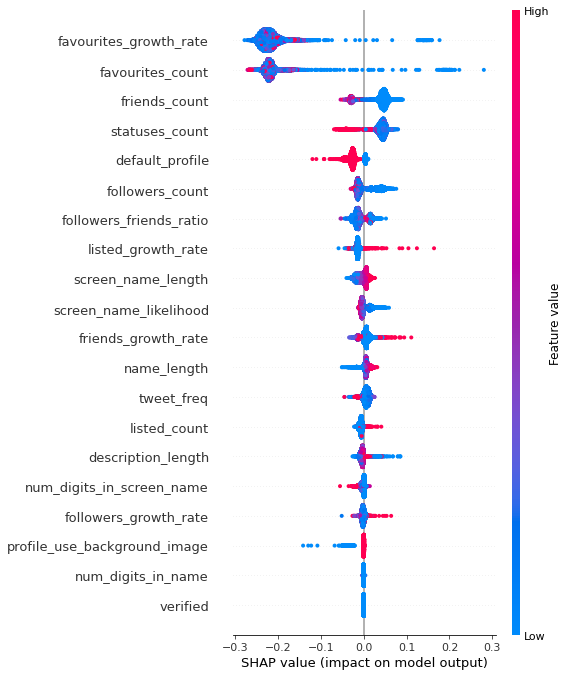

In [4]:

X_train = c_17.iloc[:, 0:20]
y_train = c_17.iloc[:, 20]

clf = RandomForestClassifier(n_estimators=100, class_weight="balanced")

clf.fit(X_train, y_train)
bad_model = clf
explainer = shap.TreeExplainer(bad_model)
X_test = pronbots.iloc[:, 0:20]
shap_values = explainer.shap_values(X_test)
print(shap_values[0].shape)
print(shap_values[0])
print(shap_values[1].shape)
print(shap_values[1])
shap.summary_plot(shap_values[1], X_test, plot_type="dot")

Better model, trained on midterm-18, tested on pronbots:

(17882, 20)
[[-5.67994066e-02  9.22819632e-02  2.00116802e-02 ...  3.76664773e-04
   1.95750370e-03  2.07801559e-03]
 [-6.77611578e-02  9.20532143e-02 -1.40765714e-01 ...  8.39132492e-04
   6.06143664e-04  1.00311211e-03]
 [-4.80297755e-02 -7.01617266e-02 -1.28983670e-01 ...  3.70082431e-04
   1.95056315e-03  5.48460107e-03]
 ...
 [-5.47713913e-02  1.13678522e-01 -1.36684884e-01 ...  7.15641926e-04
   4.13492468e-03  1.68002833e-04]
 [-4.29046345e-02 -1.25765734e-01 -8.18510250e-02 ...  1.15029207e-04
  -2.74357414e-03 -2.17667606e-02]
 [-7.39090829e-02  1.10183359e-01 -1.42909958e-01 ...  8.71546207e-04
   7.97340125e-03 -7.06011423e-03]]
(17882, 20)
[[ 5.67994066e-02 -9.22819632e-02 -2.00116802e-02 ... -3.76664773e-04
  -1.95750370e-03 -2.07801559e-03]
 [ 6.77611578e-02 -9.20532143e-02  1.40765714e-01 ... -8.39132492e-04
  -6.06143664e-04 -1.00311211e-03]
 [ 4.80297755e-02  7.01617266e-02  1.28983670e-01 ... -3.70082431e-04
  -1.95056315e-03 -5.48460107e-03]
 ...
 [ 5.47713913e-02 -1

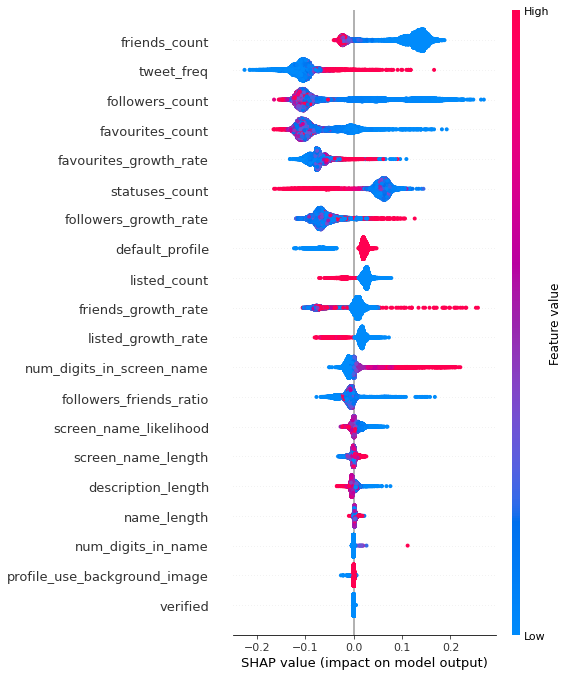

In [6]:


X_train = midterm.iloc[:, 0:20]
y_train = midterm.iloc[:, 20]

clf = RandomForestClassifier(n_estimators=100, class_weight="balanced")
clf.fit(X_train, y_train)
better_model = clf
explainer = shap.TreeExplainer(better_model)
X_test = pronbots.iloc[:, 0:20]
shap_values = explainer.shap_values(X_test)
print(shap_values[0].shape)
print(shap_values[0])
print(shap_values[1].shape)
print(shap_values[1])
shap.summary_plot(shap_values[1], X_test, plot_type="dot")


In [7]:
#pronbot celebrity

#trained on cresci, evaluated on celebrity
#trained on midterm, evaluated on celebrity

In [8]:
celeb = pd.read_csv(final_datasets_path + '/celebrity-2019.csv')

(5918, 20)
[[ 3.92159100e-02  1.25777769e-03  2.06116917e-02 ...  1.54643009e-04
   6.17632243e-03  6.49013366e-03]
 [ 3.77642080e-02 -2.65037850e-04  1.76085790e-02 ...  3.62371104e-05
   3.29052990e-03 -4.00531673e-02]
 [-2.66871971e-02  4.53614244e-03 -1.67158016e-02 ... -4.08837005e-05
   2.90219138e-04  5.35714806e-03]
 ...
 [ 3.48777599e-02 -3.55084765e-02 -6.44606539e-02 ... -4.79385524e-05
  -1.01960736e-02 -2.13517102e-03]
 [ 5.15836419e-02  9.05241472e-03  1.68494665e-02 ...  3.17913453e-04
   2.81023891e-02  4.67585503e-03]
 [ 7.54082918e-03  1.99851551e-02  2.13052775e-02 ...  3.19629991e-05
   7.45902773e-03  3.01450060e-03]]
(5918, 20)
[[-3.92159100e-02 -1.25777769e-03 -2.06116917e-02 ... -1.54643009e-04
  -6.17632243e-03 -6.49013366e-03]
 [-3.77642080e-02  2.65037850e-04 -1.76085790e-02 ... -3.62371104e-05
  -3.29052990e-03  4.00531673e-02]
 [ 2.66871971e-02 -4.53614244e-03  1.67158016e-02 ...  4.08837005e-05
  -2.90219138e-04 -5.35714806e-03]
 ...
 [-3.48777599e-02  3.5

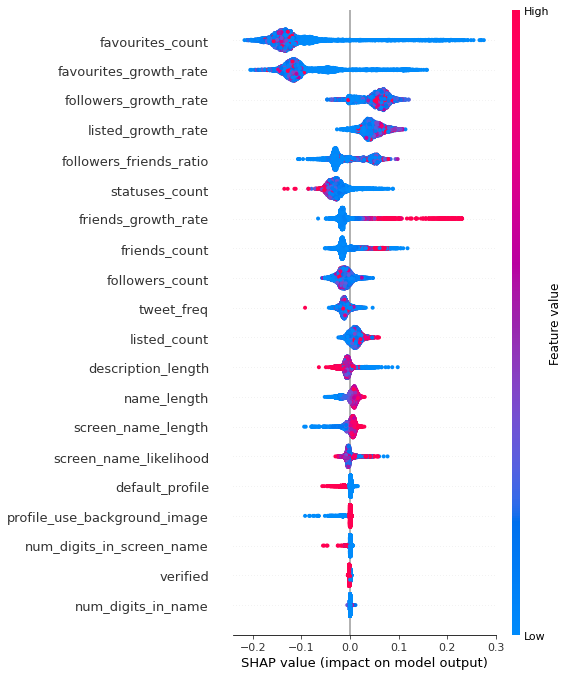

In [10]:
X_train = c_17.iloc[:, 0:20]
y_train = c_17.iloc[:, 20]

clf = RandomForestClassifier(n_estimators=100, class_weight="balanced")

clf.fit(X_train, y_train)
bad_model = clf
explainer = shap.TreeExplainer(bad_model)
X_test = celeb.iloc[:, 0:20]
shap_values = explainer.shap_values(X_test)
print(shap_values[0].shape)
print(shap_values[0])
print(shap_values[1].shape)
print(shap_values[1])
shap.summary_plot(shap_values[1], X_test, plot_type="dot")

(5918, 20)
[[ 1.03149458e-01  1.39748483e-01  1.32239118e-02 ...  3.61044823e-04
   5.07208801e-03  1.23996786e-03]
 [ 9.88364481e-02  1.45608068e-01  1.33045830e-02 ...  2.78336199e-04
   6.83929271e-05 -9.66321944e-04]
 [ 1.66499996e-02  1.70552833e-01 -4.50689361e-02 ...  4.67504812e-04
   2.25220126e-03  8.01330939e-03]
 ...
 [ 1.05231876e-01  1.52414416e-01  3.18320460e-02 ...  3.68737090e-04
   2.67248138e-03 -9.89232150e-05]
 [ 1.02263861e-01  1.44224045e-01  1.26589274e-02 ...  3.23284285e-04
   5.43540806e-03 -3.03176165e-04]
 [ 6.11298189e-02  1.86381450e-01  1.93459419e-02 ...  3.62067564e-04
  -1.14658495e-02  8.28442586e-04]]
(5918, 20)
[[-1.03149458e-01 -1.39748483e-01 -1.32239118e-02 ... -3.61044823e-04
  -5.07208801e-03 -1.23996786e-03]
 [-9.88364481e-02 -1.45608068e-01 -1.33045830e-02 ... -2.78336199e-04
  -6.83929271e-05  9.66321944e-04]
 [-1.66499996e-02 -1.70552833e-01  4.50689361e-02 ... -4.67504812e-04
  -2.25220126e-03 -8.01330939e-03]
 ...
 [-1.05231876e-01 -1.5

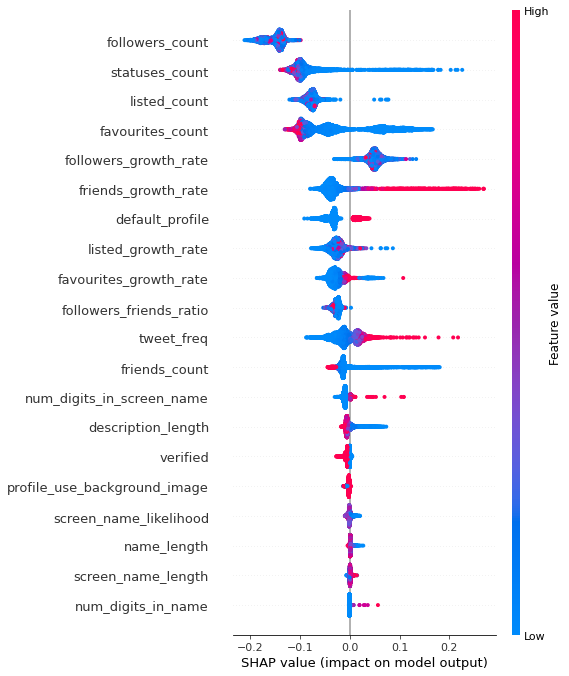

In [11]:
X_train = midterm.iloc[:, 0:20]
y_train = midterm.iloc[:, 20]

clf = RandomForestClassifier(n_estimators=100, class_weight="balanced")

clf.fit(X_train, y_train)
better_model = clf
explainer = shap.TreeExplainer(better_model)
X_test = celeb.iloc[:, 0:20]
shap_values = explainer.shap_values(X_test)
print(shap_values[0].shape)
print(shap_values[0])
print(shap_values[1].shape)
print(shap_values[1])
shap.summary_plot(shap_values[1], X_test, plot_type="dot")